# HIP 18413

In [1]:
# install https://github.com/vortex-exoplanet/PyAstrOFit

In [2]:
from __future__ import print_function
import PyAstrOFit.Orbit as Orbit
import numpy as np
from astropy.time import Time
from PyAstrOFit.Toolbox import timeConverter
from astropy import units as u
from astropy.coordinates import SkyCoord
%matplotlib inline
%load_ext autoreload
%autoreload 2

________                      _                                  ____    ________
`MMMMMMMb.                   dM.                                6MMMMb   `MMMMMMM 68b
 MM    `Mb                  ,MMb                /              8P    Y8   MM    \ Y89   /
 MM     MM ____    ___      d'YM.      ____    /M     ___  __ 6M      Mb  MM      ___  /M
 MM     MM `MM(    )M'     ,P `Mb     6MMMMb\ /MMMMM  `MM 6MM MM      MM  MM   ,  `MM /MMMMM
 MM    .M9  `Mb    d'      d'  YM.   MM'    `  MM      MM69   MM      MM  MMMMMM   MM  MM
 MMMMMMM9'   YM.  ,P      ,P   `Mb   YM.       MM      MM'    MM      MM  MM   `   MM  MM
 MM           MM  M       d'    YM.   YMMMMb   MM      MM     MM      MM  MM       MM  MM
 MM           `Mbd'      ,MMMMMMMMb       `Mb  MM      MM     YM      M9  MM       MM  MM
 MM            YMP       d'      YM. L    ,MM  YM.  ,  MM      8b    d8   MM       MM  YM.  ,
_MM_            M      _dM_     _dMM_MYMMMM9    YMMM9 _MM_      YMMMM9   _MM_     _MM_  YMMM9
           

### Instanciate an orbit object

In [3]:
par=43.9959 #parallax mas
asec= 0.442 #a [arcsec]
a = asec/(par*1.e-3)        #[A.U.]
e = 0.456
i = 51.2       #[deg]
node = 246.7    #[deg]
w = 264.6      #[deg]
t = Time(2006.63,format='decimalyear')
tp=t.jd #[JD]
P = 28.87 #[yr] +-2.7
starDistance = 1/(par*1.e-3) #[pc]

In [4]:
target = Orbit(semiMajorAxis = a,
                   eccentricity = e,
                   inclinaison = i,
                   longitudeAscendingNode = node,
                   periastron = w,
                   periastronTime = tp,
                   dStar = starDistance,
                   period=P)

In [5]:
#convert 

c1 = SkyCoord('03h56m11.5681s','+59d38m31.31s',frame='icrs')

def seppa2dradec(sep,PA):
    #sep mas, PA=deg
    PAu = PA * u.deg
    sepu = sep/3600*1.e-3 * u.deg
    print(c1.directional_offset_by(PAu,sepu))
    return c1.directional_offset_by(PAu,sepu)

sep=442.4
pa=318.5 #deg
dra, ddec = c1.spherical_offsets_to(seppa2dradec(sep,pa))
print(dra.to(u.arcsec),ddec.to(u.arcsec))

<SkyCoord (ICRS): (ra, dec) in deg
    (59.0480393, 59.64212259)>
-0.293143arcsec 0.331338arcsec


#### Position at specific observation dates

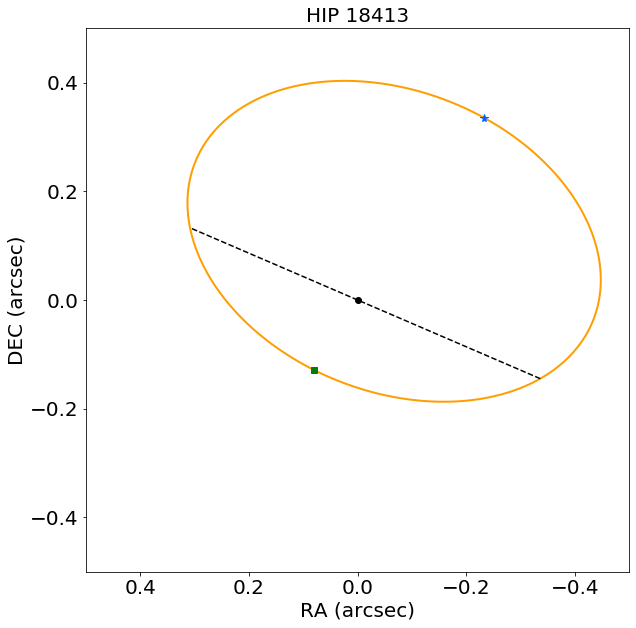

In [7]:
#data_RA,data_DEC,err_RA,err_DEC
observation_dates=['2020-09-15 0:00:00']
target.showOrbit(pointOfView = 'earth', 
                   unit = 'arcsec', 
                   figsize = (10,10), 
                   title = [r'HIP 18413',20],
                   addPosition = observation_dates,
               # addPoints = [[dra.to(u.arcsec).value],[ddec.to(u.arcsec).value],[0.02],[0.02]], 
                 #addPoints = [[-0.2496636],[-0.0865443],[0.02],[0.02]],
                 addPosition_options={'marker':'*',
                                        'markerfacecolor':(0,0.38,1.),
                                        'markeredgecolor':(0,0.38,1.),
                                        'markersize':8},)

In [8]:
# PA and separation prediction

pos = timeConverter(time='2020-09-15 2:00:00')
ta1 = target.trueAnomaly(pos)
point = target.positionOnOrbit(ta1,"earth","arcsec")
coord1 = SkyCoord(0*u.arcsec, 0*u.arcsec, frame='icrs')
coord2 = SkyCoord(point['raPosition']*u.arcsec, point['decPosition']*u.arcsec, frame='icrs')

pa_pre = coord1.position_angle(coord2).to(u.deg)
sep_pre = coord1.separation(coord2).to(u.arcsec)

In [9]:
pa_pre,sep_pre

(<Angle 325.25280589 deg>, <Angle 0.40798936 arcsec>)